# OASIS INFOBYTE 

# DATA SCIENCE TASK 4 : Email Spam Detection with ML


# VANSHIKA PATEL

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3598,ham,Then wat r u doing now? Busy wif work?,NaN,NaN,NaN
2174,ham,See? I thought it all through,NaN,NaN,NaN
2809,ham,Mm so you asked me not to call radio,NaN,NaN,NaN
4319,ham,Hey mr and I are going to the sea view and ha...,NaN,NaN,NaN
2107,ham,Hmmm ... And imagine after you've come home fr...,NaN,NaN,NaN


In [27]:

# Extracting relevant columns
text_column = 'v2'
label_column = 'v1'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[text_column], data[label_column], test_size=0.2, random_state=42)

# Converting text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Training a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Predicting on the test set
y_pred = classifier.predict(X_test_vectorized)


Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]


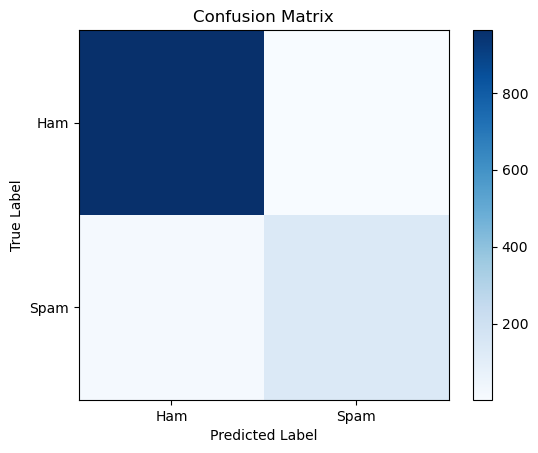

In [28]:

# Calculating accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat)

# Plotting the confusion matrix
labels = ['Ham', 'Spam']
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=[0, 1], yticks=[0, 1], xticklabels=labels, yticklabels=labels,
       title='Confusion Matrix', xlabel='Predicted Label', ylabel='True Label')
plt.show()


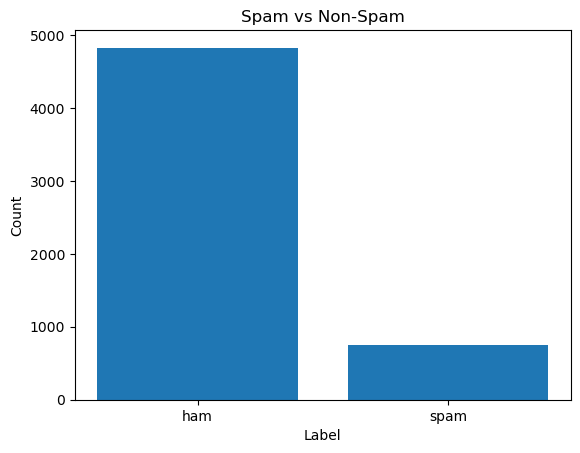

In [25]:

# Plotting bar chart of spam vs non-spam counts
spam_counts = data[label_column].value_counts()
plt.bar(spam_counts.index, spam_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Spam vs Non-Spam')
plt.show()